In [1]:
pip install uwg

Note: you may need to restart the kernel to use updated packages.


In [2]:
from uwg import UWG


# def filter_epw_file(original_file, new_file):
#     with open(original_file, 'r') as infile:
#         lines = infile.readlines()

#     header = lines[:8]  # preserve the header
#     data_lines = lines[8:]  # rest are data

#     # format of each line is (Year, Month, Day, Hour, Minute, ...)
#     # we assume that the data is ordered chronologically, so we can just find the start of the second month
#     for i, line in enumerate(data_lines):
#         parts = line.split(',')
#         if int(parts[1]) > 1:  # Month value is greater than 1
#             break

#     # new file consists of header and data for the first month
#     new_lines = header + data_lines[:i]

#     with open(new_file, 'w') as outfile:
#         outfile.writelines(new_lines)

# usage
# filter_epw_file(r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2007-2021.epw", r"D:\uwg-master\resources\Badgerys Creek 2007-2021_Jan2010.epw")


In [3]:
# Add inputs

# Input 1 - Blue Graph

model_inputs1 = [
    {'bldheight': 3, 'blddensity': 0.05, 'vertohor': 0.2, 'grasscover': 0.7, 'treecover': 0.2, 'zone': '2A',
     'charlength': 1080, 'h_mix': 0.1, 'albroad': 0.5}
]

# Input 2 - Orange Graph

model_inputs2 = [
    {'bldheight': 50, 'blddensity': 0.9, 'vertohor': 0.9, 'grasscover': 0.05, 'treecover': 0.04, 'zone': '2A',
    'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.1}
]

# charlength = length of area (one side of square) in m. Badgerys Creek covers an area of about 27km2
# h_mix = HVAC waste heat released into street canyon.
# albroad = albedo of roads
# zone = ASHRAE weather zone of area. Badgerys Creek is Zone 2A (Temperate)

EPW data for January 2010 saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
New climate file is generated at C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January_UWG.epw.
Modified EPW saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan1.epw
Simulating new temperature and humidity values for 

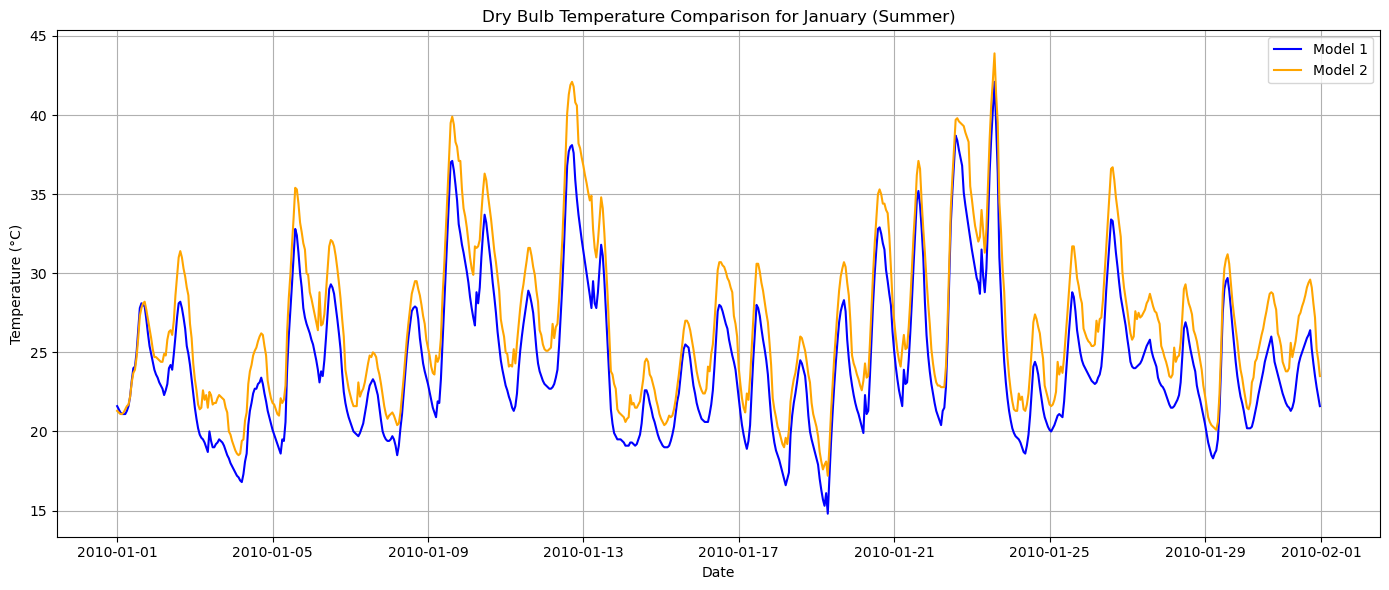

In [33]:
import os
import matplotlib.pyplot as plt
from uwg import UWG
from datetime import datetime, timedelta

# Path to the EPW file
epw_path = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2007-2021.epw"

# Define your model input configurations
model_inputs1 = [{'bldheight': 3, 'blddensity': 0.05, 'vertohor': 0.2, 'grasscover': 0.7, 'treecover': 0.2, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.1, 'albroad': 0.5}]

model_inputs2 = [{'bldheight': 50, 'blddensity': 0.9, 'vertohor': 0.9, 'grasscover': 0.05, 'treecover': 0.04, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.1}]

def filter_epw_file_for_january(original_file, new_file, target_year=2010):
    """Filter an EPW file to retain only the data for January of a specific year."""
    with open(original_file, 'r') as infile:
        lines = infile.readlines()

    # Extract the header
    header = lines[:8]

    # Extract the data
    data_lines = lines[8:]

    january_data = [line for line in data_lines if int(line.split(',')[0]) == target_year and int(line.split(',')[1]) == 1]  # filter for January
    
    new_lines = header + january_data
    
    with open(new_file, 'w') as outfile:
        outfile.writelines(new_lines)

    print(f"EPW data for January {target_year} saved to: {new_file}")

def run_uwg_model(epw_path, model_input, output_path):
    """Run the UWG model with given parameters and EPW path."""
    model = UWG.from_param_args(
        epw_path=epw_path,
        bldheight=model_input['bldheight'],
        blddensity=model_input['blddensity'],
        vertohor=model_input['vertohor'],
        grasscover=model_input['grasscover'],
        treecover=model_input['treecover'],
        zone=model_input['zone'],
        charlength=model_input['charlength'],
        h_mix=model_input['h_mix'],
        albroad=model_input['albroad']
    )
    model.generate()
    model.simulate()
    model.write_epw()

    # Handle file renaming
    default_output_path = epw_path.replace(".epw", "_UWG.epw")
    if os.path.exists(output_path):
        os.remove(output_path)
    os.rename(default_output_path, output_path)

    print(f"Modified EPW saved to: {output_path}")
    return model

def extract_dry_bulb_from_epw(epw_file_path):
    """Extract dry bulb temperature from an EPW file."""
    with open(epw_file_path, 'r') as file:
        lines = file.readlines()
    return [float(line.split(',')[6]) for line in lines[8:]]

def plot_dry_bulb_temperature(dbt1, dbt2):
    """Plot dry bulb temperatures from two model outputs."""
    time_axis = [datetime(2010, 1, 1, 0, 0) + timedelta(hours=i) for i in range(len(dbt1))]
    plt.figure(figsize=(14, 6))
    plt.plot(time_axis, dbt1, label='Model 1', color='blue')
    plt.plot(time_axis, dbt2, label='Model 2', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Dry Bulb Temperature Comparison for January (Summer)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

filtered_epw_path1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January.epw"

# Filter EPW for January 2010 data
filter_epw_file_for_january(epw_path, filtered_epw_path1, 2010)  
 
# Specify the output paths
model_output_path_jan1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan1.epw"
model_output_path_jan2 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan2.epw"

# Running UWG models
run_uwg_model(filtered_epw_path1, model_inputs1[0], model_output_path_jan1)
run_uwg_model(filtered_epw_path1, model_inputs2[0], model_output_path_jan2)

# Extracting dry bulb temperatures
model_output_jan1_dbt = extract_dry_bulb_from_epw(model_output_path_jan1)
model_output_jan2_dbt = extract_dry_bulb_from_epw(model_output_path_jan2)

# Plotting
plot_dry_bulb_temperature(model_output_jan1_dbt, model_output_jan2_dbt)

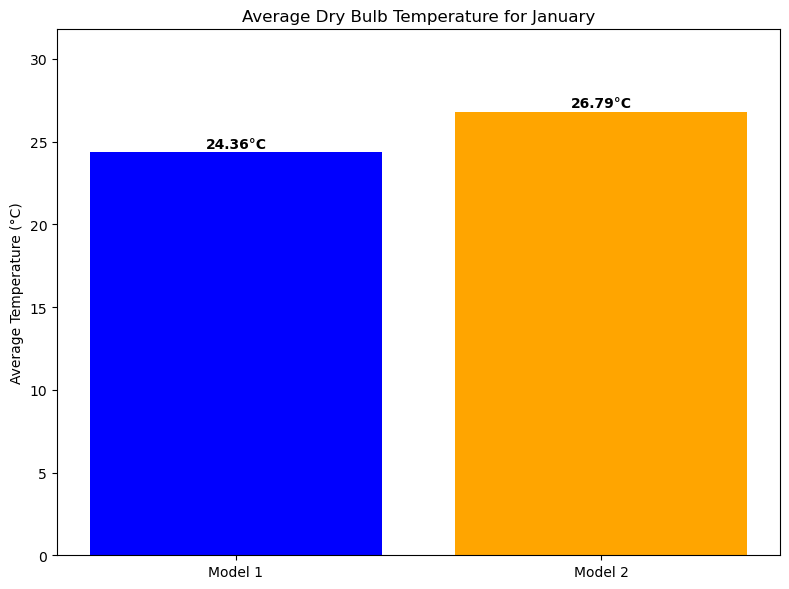

In [34]:
def plot_average_temperature(dbt1, dbt2):
    """Plot average dry bulb temperatures for two models."""
    avg_temp_1 = sum(dbt1) / len(dbt1)
    avg_temp_2 = sum(dbt2) / len(dbt2)
    
    # Plotting
    models = ['Model 1', 'Model 2']
    avg_temps = [avg_temp_1, avg_temp_2]
    
    plt.figure(figsize=(8, 6))
    plt.bar(models, avg_temps, color=['blue', 'orange'])
    for i, v in enumerate(avg_temps):
        plt.text(i, v + 0.1, "{:.2f}°C".format(v), ha='center', va='bottom', fontweight='bold')
    plt.ylabel('Average Temperature (°C)')
    plt.title('Average Dry Bulb Temperature for January')
    plt.ylim(0, max(avg_temps) + 5)  # Increase y-limit for clarity
    plt.tight_layout()
    plt.show()

# Extracting dry bulb temperatures
model_output_jan1_dbt = extract_dry_bulb_from_epw(model_output_path_jan1)
model_output_jan2_dbt = extract_dry_bulb_from_epw(model_output_path_jan2)

# Plotting average temperatures
plot_average_temperature(model_output_jan1_dbt, model_output_jan2_dbt)


EPW data for 2021 saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
New climate file is generated at C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021_UWG.epw.
Modified EPW saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July1.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simul

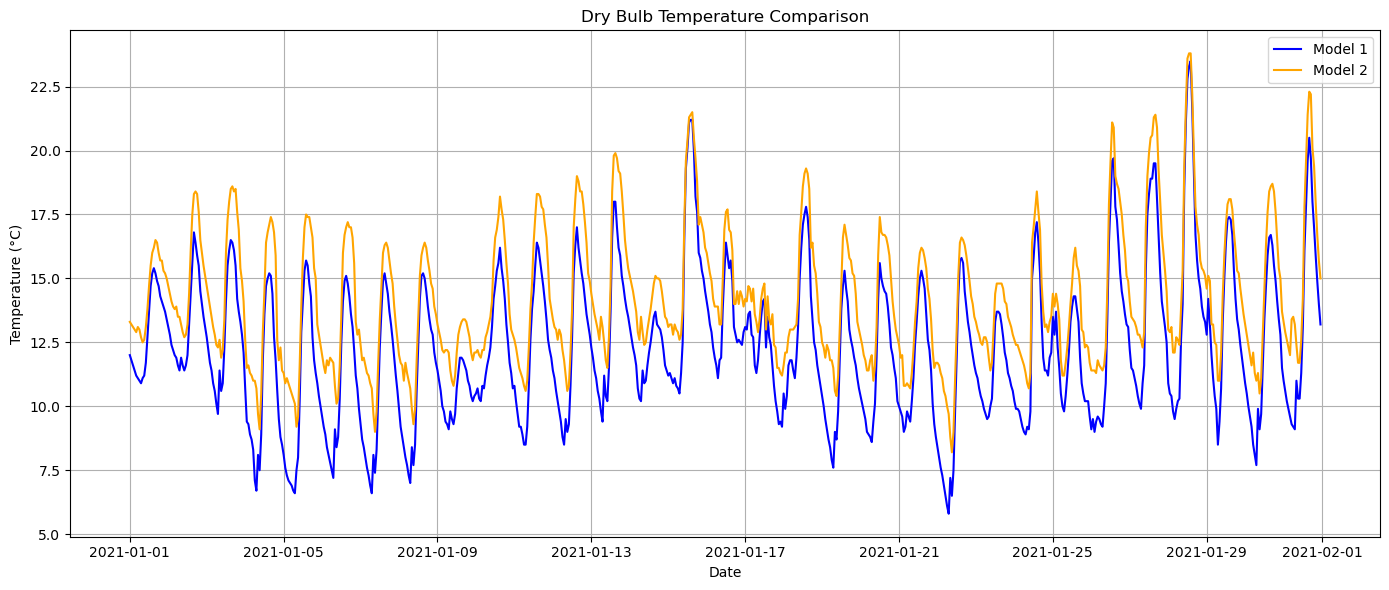

In [29]:
import os
from uwg import UWG
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def filter_epw_file_for_year(original_file, new_file, target_year=2021):
    """Filter an EPW file to retain only the data for a specific year."""
    with open(original_file, 'r') as infile:
        lines = infile.readlines()

    # Extract the header
    header = lines[:8]

    # Extract the data
    data_lines = lines[8:]
    
    year_data = [line for line in data_lines if int(line.split(',')[0]) == target_year]
    
    new_lines = header + year_data
    
    with open(new_file, 'w') as outfile:
        outfile.writelines(new_lines)

    print(f"EPW data for {target_year} saved to: {new_file}")
    
# Define your model input configurations
model_inputs1 = [{'bldheight': 3, 'blddensity': 0.05, 'vertohor': 0.2, 'grasscover': 0.7, 'treecover': 0.2, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.1, 'albroad': 0.5}]

model_inputs2 = [{'bldheight': 50, 'blddensity': 0.9, 'vertohor': 0.9, 'grasscover': 0.05, 'treecover': 0.04, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.1}]

def run_uwg_model(epw_path, model_input, output_path):
    """Run the UWG model with given parameters and EPW path."""
    model = UWG.from_param_args(
        epw_path=epw_path,
        bldheight=model_input['bldheight'],
        blddensity=model_input['blddensity'],
        vertohor=model_input['vertohor'],
        grasscover=model_input['grasscover'],
        treecover=model_input['treecover'],
        zone=model_input['zone'],
        charlength=model_input['charlength'],
        h_mix=model_input['h_mix'],
        albroad=model_input['albroad']
    )
    model.generate()
    model.simulate()
    model.write_epw()
    
    # Move the output EPW to the desired location
    default_output_path = epw_path.replace(".epw", "_UWG.epw")
    if os.path.exists(output_path):
        os.remove(output_path)
    os.rename(default_output_path, output_path)
    
    print(f"Modified EPW saved to: {output_path}")
    return model

def extract_dry_bulb_from_epw(epw_file_path):
    """Extract dry bulb temperatures from EPW file."""
    with open(epw_file_path, 'r') as file:
        lines = file.readlines()

    # Skipping the header
    data_lines = lines[8:]

    # Extracting the dry bulb temperature (field index 6 in EPW format)
    dry_bulb_temp = [float(line.split(',')[6]) for line in data_lines]
    return dry_bulb_temp

def plot_dry_bulb_temperature(dbt3, dbt4):
    """Plot dry bulb temperatures from two model outputs."""
    time_axis = [datetime(2021, 1, 1, 0, 0) + timedelta(hours=i) for i in range(len(dbt3))]
    plt.figure(figsize=(14, 6))
    plt.plot(time_axis, dbt3, label='Model 1', color='blue')
    plt.plot(time_axis, dbt4, label='Model 2', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Dry Bulb Temperature Comparison for July (Winter)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

filtered_epw_path = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021.epw"

# Filter EPW for 2021 data
filter_epw_file_for_year(epw_path, filtered_epw_path, 2021)

# Specify the output paths
model_output_path_july1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July1.epw"
model_output_path_july2 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July2.epw"

# Running UWG models
run_uwg_model(filtered_epw_path, model_inputs1[0], model_output_path_july1)
run_uwg_model(filtered_epw_path, model_inputs2[0], model_output_path_july2)

# Extracting dry bulb temperatures
model_output_july1_dbt = extract_dry_bulb_from_epw(model_output_path_july1)
model_output_july2_dbt = extract_dry_bulb_from_epw(model_output_path_july2)

# Plotting
plot_dry_bulb_temperature(model_output_july1_dbt, model_output_july2_dbt)


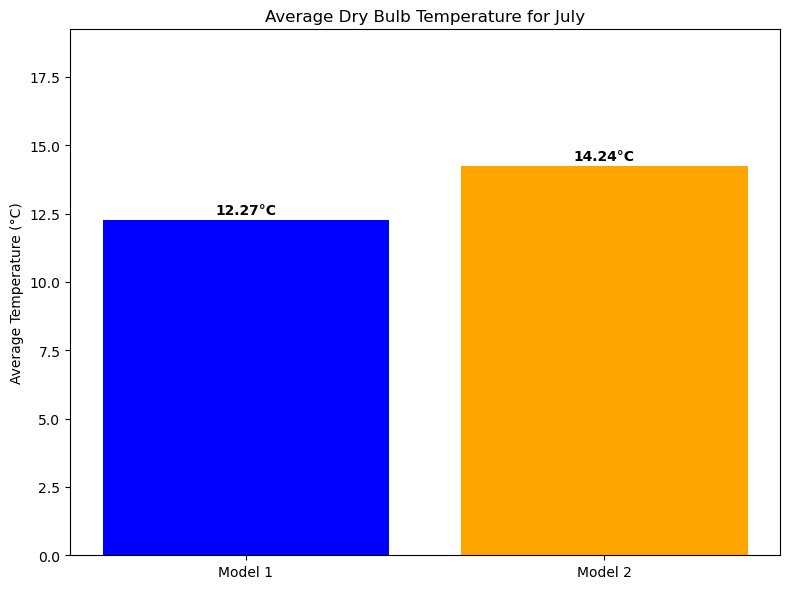

In [36]:
def plot_average_temperature(dbt3, dbt4):
    """Plot average dry bulb temperatures for two models."""
    avg_temp_1 = sum(dbt3) / len(dbt3)
    avg_temp_2 = sum(dbt4) / len(dbt4)
    
    # Plotting
    models = ['Model 1', 'Model 2']
    avg_temps = [avg_temp_1, avg_temp_2]
    
    plt.figure(figsize=(8, 6))
    plt.bar(models, avg_temps, color=['blue', 'orange'])
    for i, v in enumerate(avg_temps):
        plt.text(i, v + 0.1, "{:.2f}°C".format(v), ha='center', va='bottom', fontweight='bold')
    plt.ylabel('Average Temperature (°C)')
    plt.title('Average Dry Bulb Temperature for July')
    plt.ylim(0, max(avg_temps) + 5)  # Increase y-limit for clarity
    plt.tight_layout()
    plt.show()

# Extracting dry bulb temperatures
model_output_july1_dbt = extract_dry_bulb_from_epw(model_output_path_july1)
model_output_july2_dbt = extract_dry_bulb_from_epw(model_output_path_july2)

# Plotting average temperatures
plot_average_temperature(model_output_july1_dbt, model_output_july2_dbt)